# Linear Regression and Linear Classification
We will study the family of linear predictors, one of the most useful families of hypothesis classes.
Many learning algorithms that are being widley used in practice rely on linear predictors.
Especially, linear predictors are intuitive and easy to interpret.

## Linear regression

Let's start with linear regression.
The linear regression is a model that predicts real values using a linear function.
The linear regression is a kind of supervised learning; in supervised learning, we have a training data labeled with correct outputs.
We assume a linear relationshipe between inputs, $\mathcal{X}$ and outputs, $\mathcal{Y}$.
The relationship is mathematically defined below.
$$y = f({\mathbf x}) = \sum_{i=1}^d w_i x_i + b = {\mathbf w}^{\rm T}{\mathbf x} + b~~~({\mathbf x} \in {\mathcal X}, y \in {\mathcal Y}, {\mathbf w} \in {\mathbb R}^d)$$
${\mathbf w}$ is called a weight vector and $b$ a bias.
The following figure shows an example of linear regression.
The line goes through the vicinity of all samples.

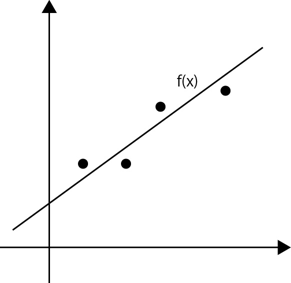

In [9]:
from PIL import Image

im = Image.open('linearRegression.jpg')
im.resize((im.width // 2, im.height // 2))

## Linear regression
### Problem setting
To determine an appropriate linear function, it is necessary to evaluate how well it fits the data.
Generally, such evaluation functions are called loss functions.
The loss function is represented as $E(y, t)$, which takes the predicted value $y$ and the correct output (target value) $t$ as arguments.
In linear regression, we usually use squared error.
$$ E(y,t)= \frac{1}{2}(y−t)^2 $$
This is small when $y$ and $t$ are close together, and large when they are far apart. Generally, the value $y − t$ is known as the residual, and we’d like the residuals to be close to zero.
By minimizing a cost function, which is averaged over all the training examples, we can determine the appropriate linear function through optimization.
$$ L({\mathbf w}, b) = \frac{1}{N}\sum_{i=1}^N E(y_i, t_i) = \frac{1}{2N}\sum_{i=1}^N \left({\mathbf w}^{\rm T} {\mathbf x}_i + b - t_i \right)^2$$
The final goal of linear regression is to determine the values of ${\mathbf w}$ and b that minimize the loss function $L({\mathbf w}, b)$.

### Optimaization
Minimizing the loss function is equivalent to solving an optimization problem, and differentiation is used for this purpose.
Furthermore, since input data is typically represented as a multi-dimensional vector, the loss function becomes a function in a multi-dimensional space, making it impossible to visualize.
Therefore, it is necessary to use differentiation to minimize the loss function.

Since the loss function must be minimized with respect to ${\mathbf w}$ or $b$, it is necessary to find the derivatives with respect to ${\mathbf w}$ and $b$.
$$\frac{\partial L({\mathbf w}, b)}{\partial {\mathbf w}} = \frac{1}{N} \sum_{i=1}^N \left( {\mathbf x}_i ({\mathbf w}^{\rm T}{\mathbf x}_i + b - t_i) \right) $$
$$\frac{\partial L({\mathbf w}, b)}{\partial b} = \frac{1}{N} \sum_{i=1}^N ({\mathbf w}^{\rm T}{\mathbf x}_i + b - t_i) $$
The loss function is originally a quadratic function with respect to ${\mathbf w}$ and 
$b$ and it is a concave down function.
Therefore, the point where the derivatives are zero becomes the minimum.
Here, we will introduce two solutions: the analytical solution and the numerical solution.

#### Analytic solution
In this solution, we directly solve the following formulae.
$$\frac{1}{N} \sum_{i=1}^N \left( {\mathbf x}_i ({\mathbf w}^{\rm T}{\mathbf x}_i + b - t_i) \right) = 0$$
$$\frac{1}{N} \sum_{i=1}^N ({\mathbf w}^{\rm T}{\mathbf x}_i + b - t_i) = 0$$

To simplify the notation, we introduce new symbols to rewrite the above formulae in the form of linear algebra.
$$ X = \left( {\mathbf x}'_1, {\mathbf x}'_2, \cdots, {\mathbf x}'_N \right)^{\rm T}$$
$$ {\mathbf x}'_i = ({\mathbf x}^{\rm T}, 1)^{\rm T} $$
$X$ is the matrix where the expanded input of the training data is arranged as column vectors.
Using $X$, we rewrite the previous formulae.
$$ {\mathbf y} = X{\mathbf w}' $$
$$ {\mathbf w}' = ({\mathbf w}^{\rm T}, b)^{\rm T} $$
$$ L({\mathbf w}') = \frac{1}{2N} \| {\mathbf y} - {\mathbf t} \|^2 $$
${\mathbf w}'$ denotes the expanded weight including the bias and ${\mathbf t}$ is $(t_1, t_2, \cdots, t_N)^{\rm T}$.
So, the derivative is rewritten.
$$ \frac{1}{N}X^{\rm T} \left( X{\mathbf w}' - {\mathbf t} \right) = 0 $$
Finally, ${\mathbf w}' = \left( X^{\rm T}X \right)^{-1}X^{\rm T} {\mathbf t}$ is obtained and is the optimal weight.

#### Numerical solution
Minimizing the loss function is also possible using numerical approaches.
Speaking concretely, it is gradient descent.
The gradient descent is a kind of iterative algorithms, which means that we apply a certain update rule over and over again, and the iterates will gradually improve the loss function.
In the gradient descent, we initialize the weight to arbitrary value (e.g. all zeros), and repeatedly adjust them in the direction that most decreases the loss function.
We repeat the procedure until the loss function does not change.

We can formalize the gradient descent using the following update rule.
$$ {\mathbf w} = {\mathbf w} - \alpha \frac{\partial L({\mathbf w})}{\partial {\mathbf w}} = {\mathbf w} - \frac{\alpha}{N}X^{\rm T}\left( X{\mathbf w} - {\mathbf t} \right) $$
$\alpha$ is called the learning rate and it is generally set to a small value in advance.

## Linear classification

By assuming a linear relationship between inputs and outputs, we can consider linear classification to estimate categories.
Because the output is a categorical variable, it is common to add a sign function to the linear function.
$$ y = {\rm sign}\left( {\mathbf w}^{\rm T} {\mathbf x} + b\right) = {\rm sign}\left(f({\mathbf x}) \right)$$
$$ {\rm sign}(z) = \left\{\begin{align} +1 & (z > 0) \\ -1 & (z < 0) \end{align}\right.$$
In the classification, ${\mathcal Y} = \{+1, -1\}$.
The line represents the decision boundary in the following figure.

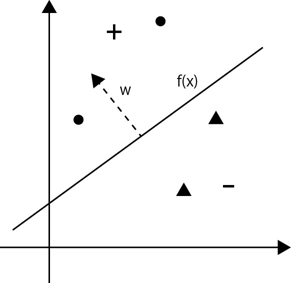

In [11]:
from PIL import Image

im = Image.open('linearClassification.jpg')
im.resize((im.width//2, im.height//2))

Generally, the linear function, $f({\mathbf x})$, constructs a hyperplane and divides a space into two areas.
One side denotes a positive and another side is negative.
It means that the linear classification constructs a binary classifier.

### Perceptron learning
In linear classification, the goal is to find a boundary plane that classifies data according to its labels.
Speaking concretely, a function outputs a positive value for an example when its label is 1 and outputs a negative value when its label is -1.
The linear classification is trained with a method different from linear regression.
Here, we will introduce the Perceptron learning rule.
$$ \Delta {\mathbf w} = \left\{ \begin{align} 0 & (ty > 0) \\ {\mathbf x} & (ty \le 0) \end{align}\right.$$
$yt>0$ indicates that the prediction is correct, while $yt \le 0$ indicates that the prediction is incorrect.
The weights are updated using $\Delta {\mathbf w}$ as follows.
$$ {\mathbf w} = {\mathbf w} + \alpha t\Delta {\mathbf w} $$

Let's consider this update formula.
Now, let's think about the case where $t=-1$ abd $y > 0$.
In this case, $ty < 0$.
We consider classifying the same example again using the updated ${\mathbf w}$.
$$ y = ({\mathbf w} + \alpha t{\mathbf x})^{\rm T} {\mathbf x} = {\mathbf w}^{\rm T}{\mathbf x} - \alpha \|{\mathbf x}\|^2 $$
By using the updated weights, $y$ has become smaller.
It indicates that learning is taking place in the correct direction.

The perceptron learning rule is repeatedly applied until no more weight updates occur. 
As a result, when the updates are finished, all of the training data can be correctly classified.
However, it is important to note that if the training data itself cannot be classified by a linear function (not linear separable), the updates may never end.

## Assignment
Construct a linear classifier using the Iris dataset.
The Iris dataset can be downloaded using the following script.

In [6]:
from sklearn.datasets import load_iris

iris_data = load_iris()
piris_data['DESCR']

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =